# Working with ````asammdf.Signal````

In [37]:
from asammdf import Signal
print(Signal.__doc__)


    The *Signal* represents a channel described by it's samples and timestamps.
    It can perform arithmetic operations against other *Signal* or numeric types.
    The operations are computed in respect to the timestamps (time correct).
    The non-float signals are not interpolated, instead the last value relative
    to the current timestamp is used.
    *samples*, *timestamps* and *name* are mandatory arguments.

    Parameters
    ----------
    samples : numpy.array | list | tuple
        signal samples
    timestamps : numpy.array | list | tuple
        signal timestamps
    unit : str
        signal unit
    name : str
        signal name
    conversion : dict | channel conversion block
        dict that contains extra conversion information about the signal ,
        default *None*
    comment : str
        signal comment, default ''
    raw : bool
        signal samples are raw values, with no physical conversion applied
    master_metadata : list
        master name and sy

In [38]:
# Imports to pretty up plots.
%matplotlib inline
import seaborn as sns
import numpy as np

In [39]:
# Full Sheet of Paper Plots
sns.set(
    rc={
        "figure.figsize": (11.69, 8.27), # A4 paper size.
        "figure.facecolor": "w",
        "figure.edgecolor": "k",
        "axes.labelsize": 18,
        "axes.titlesize": 18,
    }
)

## 0.1: Create 3 Signal objects with different time stamps

In [40]:
# unit8 with 100ms time raster
timestamps = np.array([0.1 * t for t in range(5)], dtype=np.float32)
s_uint8 = Signal(
    samples=np.array([t for t in range(5)], dtype=np.uint8),
    timestamps=timestamps,
    name="Uint8_Signal",
    unit="u1",
)

# int32 with 50ms time raster
timestamps = np.array([0.05 * t for t in range(10)], dtype=np.float32)
s_int32 = Signal(
    samples=np.array(list(range(-500, 500, 100)), dtype=np.int32),
    timestamps=timestamps,
    name="Int32_Signal",
    unit="i4",
)

# float64 with 300ms time raster
timestamps = np.array([0.3 * t for t in range(3)], dtype=np.float32)
s_float64 = Signal(
    samples=np.array(list(range(2000, -1000, -1000)), dtype=np.int32),
    timestamps=timestamps,
    name="Float64_Signal",
    unit="f8",
)

# Map signals

In [41]:
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

In [42]:
vals = np.linspace(0, 180.0 / np.pi, 100)
phi = np.ones((len(vals), 50, 50), dtype=np.float64)

In [43]:
for i, val in enumerate(vals):
    phi[i] *= val
R = 1 - np.sqrt(X ** 2 + Y ** 2)
samples = np.cos(2 * np.pi * X + phi) * R

timestamps = np.arange(0, 2, 0.02)

s_map = Signal(
    samples=samples, timestamps=timestamps, name="Variable Map Signal", unit="dB"
)

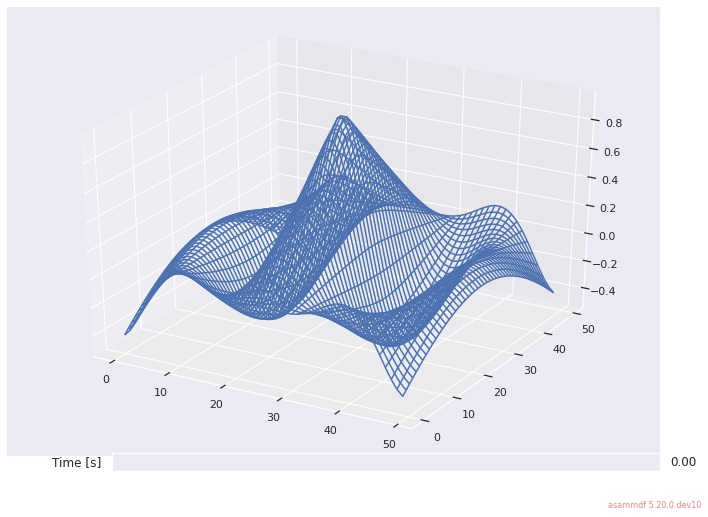

In [44]:
s_map.plot()

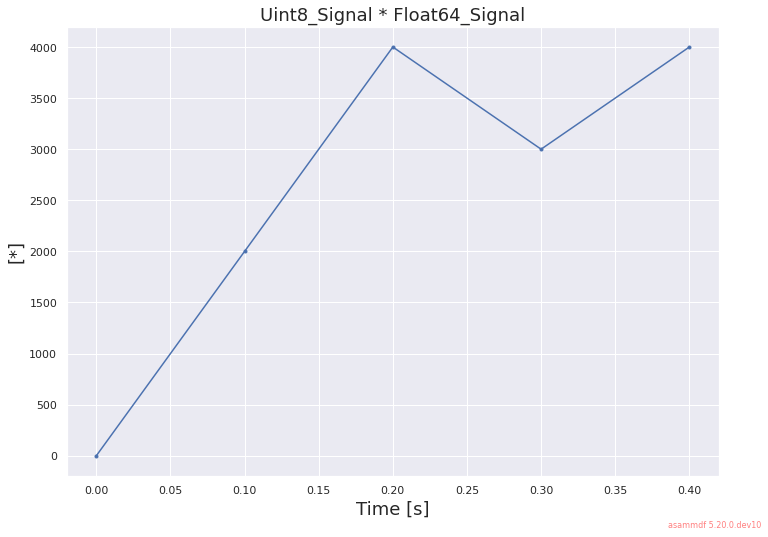

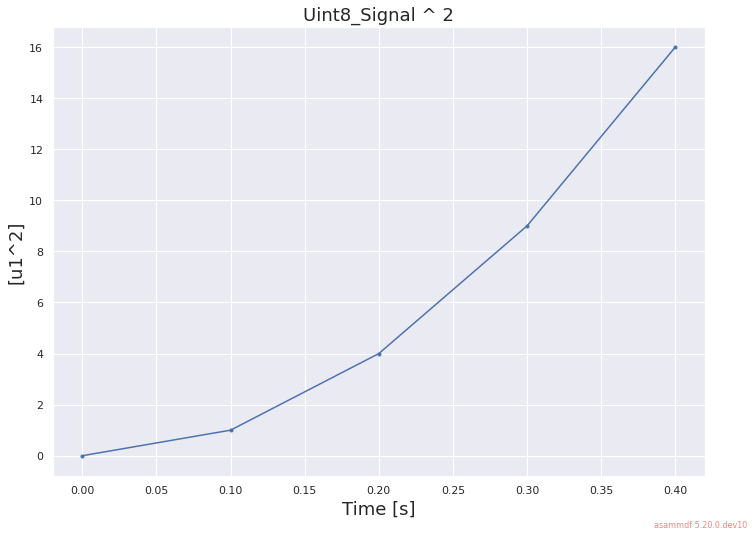

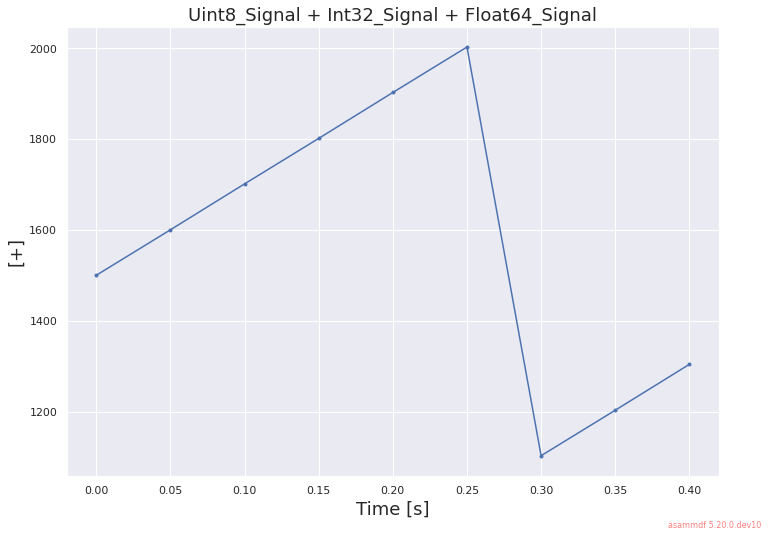

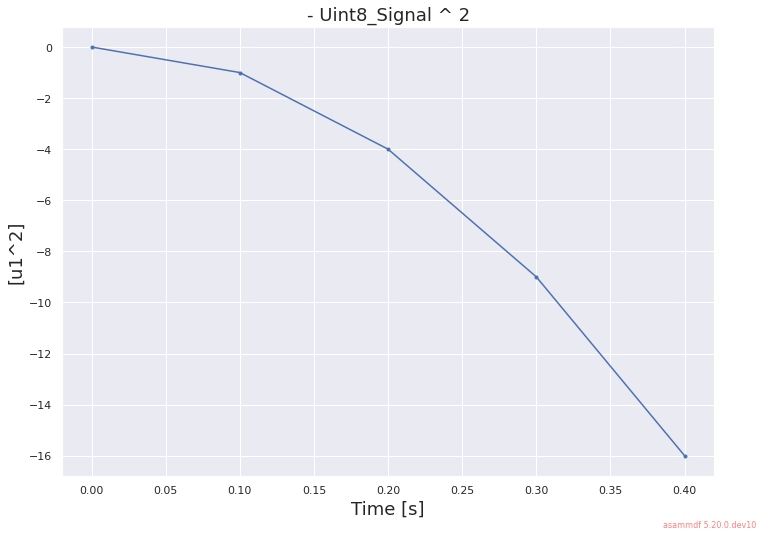

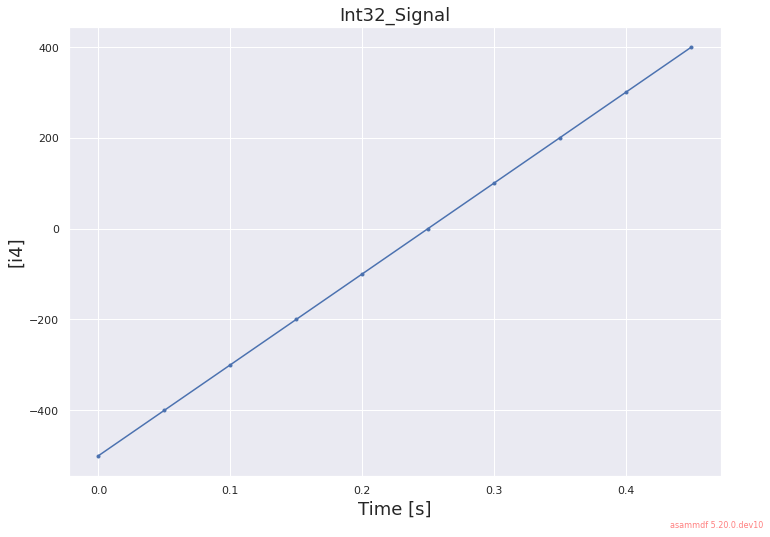

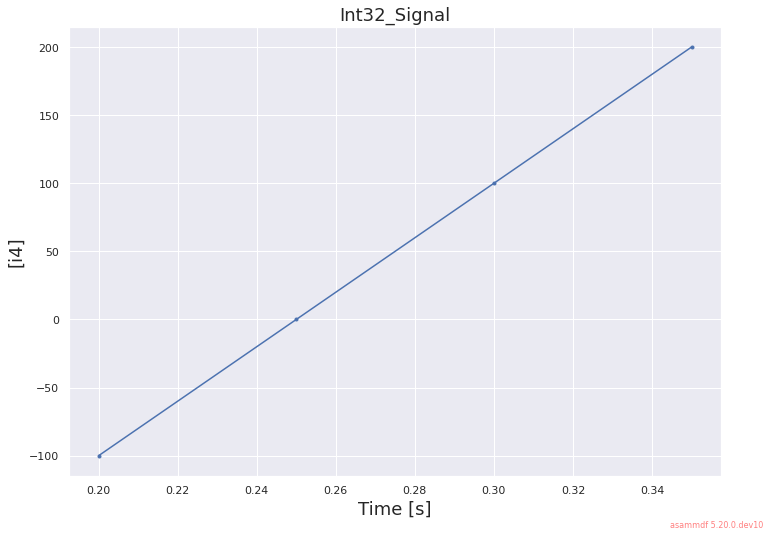

In [45]:
prod = s_float64 * s_uint8
prod.name = "Uint8_Signal * Float64_Signal"
prod.unit = "*"
prod.plot()

pow2 = s_uint8 ** 2
pow2.name = "Uint8_Signal ^ 2"
pow2.unit = "u1^2"
pow2.plot()

allsum = s_uint8 + s_int32 + s_float64
allsum.name = "Uint8_Signal + Int32_Signal + Float64_Signal"
allsum.unit = "+"
allsum.plot()

# inplace operations
pow2 *= -1
pow2.name = "- Uint8_Signal ^ 2"
pow2.plot()

# cut signal
s_int32.plot()
cut_signal = s_int32.cut(start=0.2, stop=0.35)
cut_signal.plot()


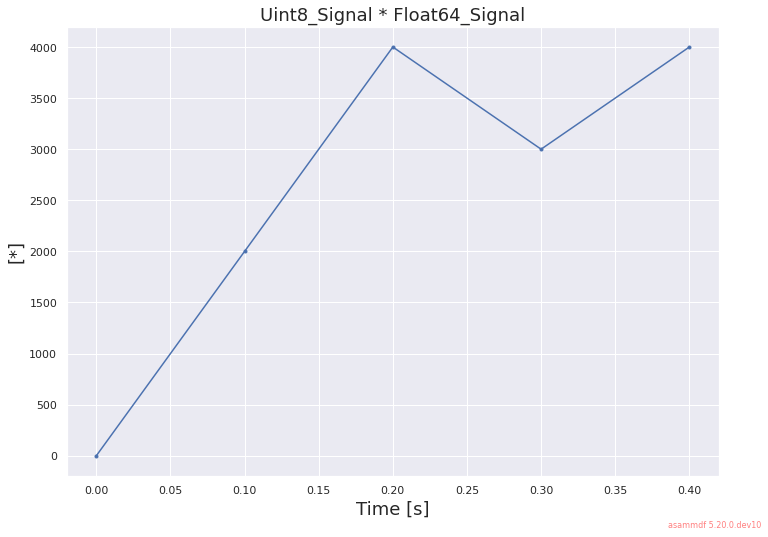

In [46]:
prod = s_float64 * s_uint8
prod.name = "Uint8_Signal * Float64_Signal"
prod.unit = "*"
prod.plot()

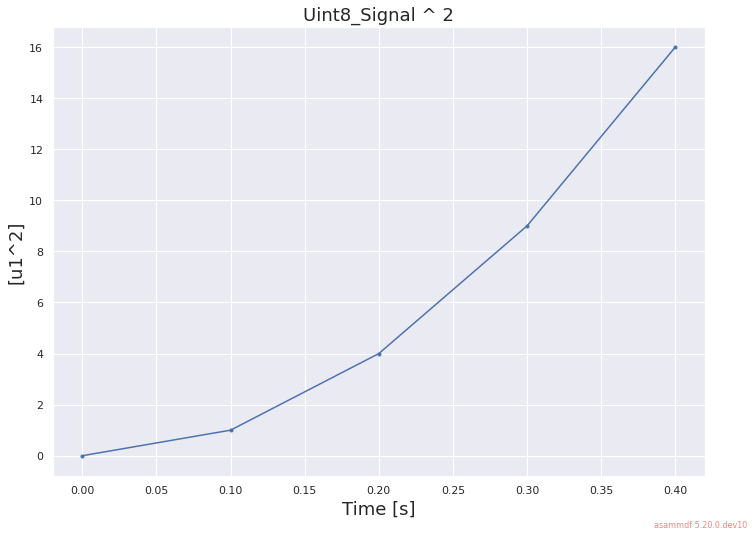

In [47]:
pow2 = s_uint8 ** 2
pow2.name = "Uint8_Signal ^ 2"
pow2.unit = "u1^2"
pow2.plot()

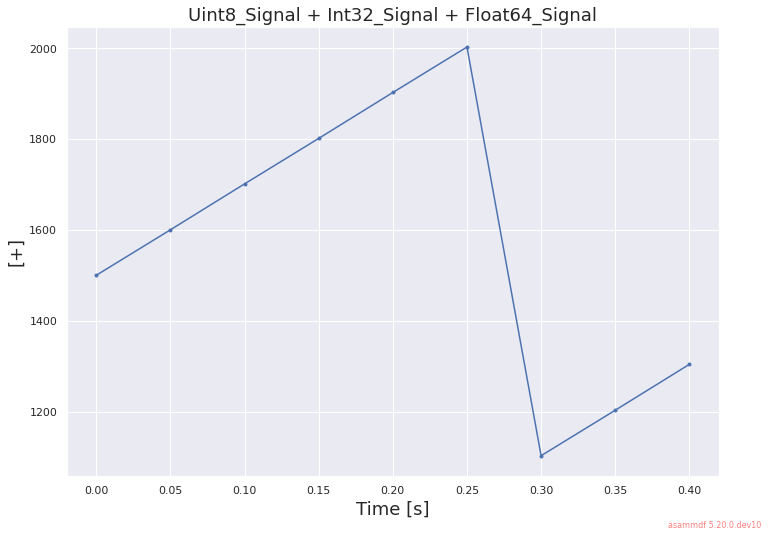

In [48]:
allsum = s_uint8 + s_int32 + s_float64
allsum.name = "Uint8_Signal + Int32_Signal + Float64_Signal"
allsum.unit = "+"
allsum.plot()

# Inplace operations

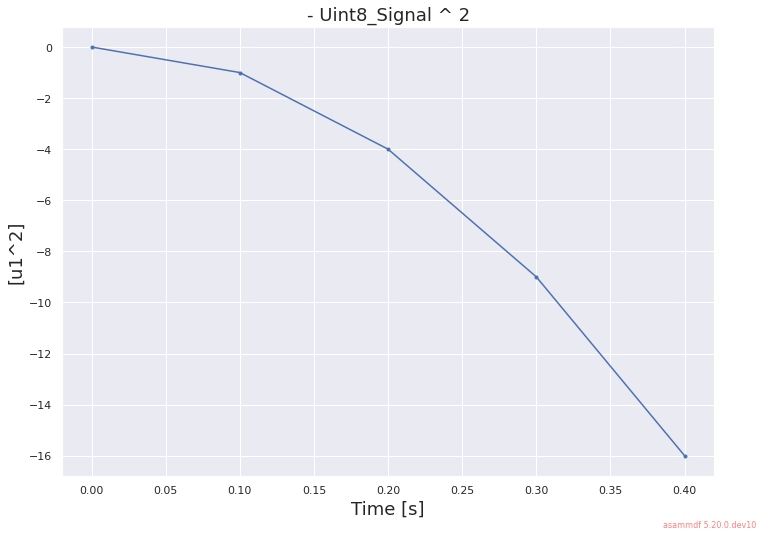

In [49]:
pow2 *= -1
pow2.name = "- Uint8_Signal ^ 2"
pow2.plot()

# Cut Signal

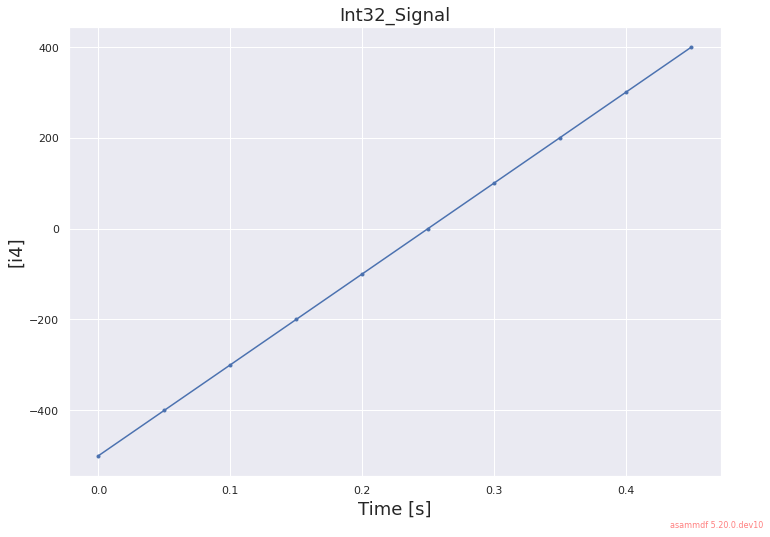

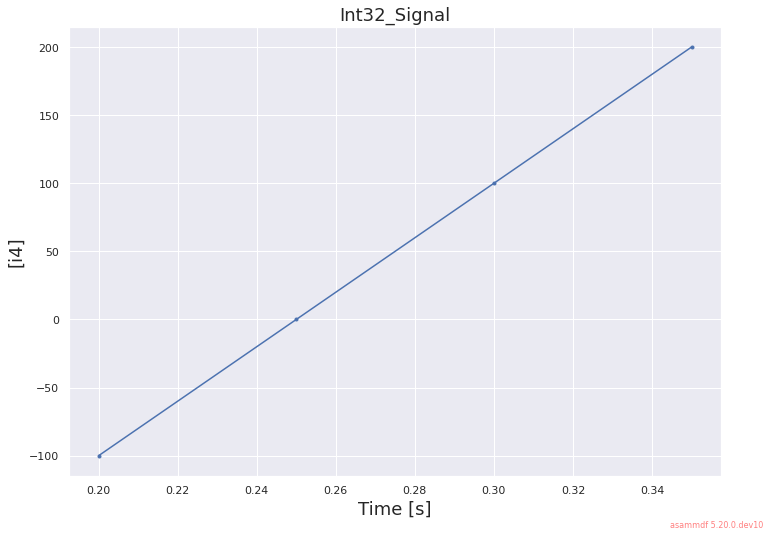

In [50]:
s_int32.plot()
cut_signal = s_int32.cut(start=0.2, stop=0.35)
with warnings.catch_warnings():
    cut_signal.plot()